# Der Messprozess - von analogen zu digitale Datenpunkten

In [1]:
# Definition der benötigten Funktionspakete

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import math
import os

## Wir erstellen ein künstliches (quasi-analoges) Signal

In [2]:
N = 1001 # Länge des Datenvektors
t = np.linspace(0, N-1, N) # Zeitvektor von Punkten mit Abstand 1 in Einheit von Nanosekunden (als konkretes Beispiel)
# t_tot = N ns für unser Beispiel

f_sig = 0.01
Amp1 = 1.2 
sig1 = Amp1*np.sin(2*np.pi*f_sig*t) # Sinuswelle
noise_amp = 0.05
noise1 = np.random.normal(0,noise_amp,N) # normalverteiltes Rauschen mit Standardabweichung noise_amp
U = sig1 + noise1 # das zu beobachtendes Spannungssignal mit Frequenz f_sig in Einheiten von Volt V

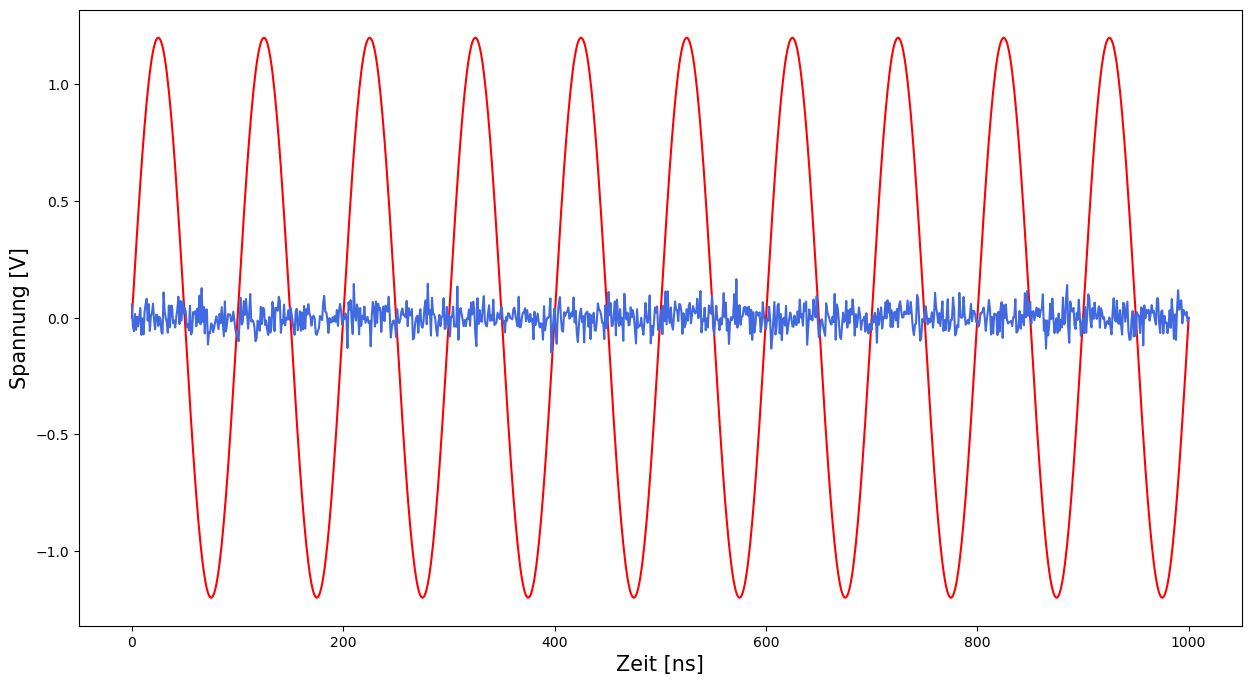

In [3]:
plt.figure(figsize=(15, 8))
plt.plot(t, sig1, color='red', label="Spannung U (V)")
plt.plot(t, noise1, color='royalblue', label="Spannung U (V)")
#plt.axes().set_aspect('auto', 'datalim') # somehow doesn't work
plt.xlabel('Zeit [ns]', fontsize = 15)
plt.ylabel('Spannung [V]', fontsize = 15)
plt.show()

## Wir "messen" unser Signal mit einem simulierten Analog-Digital-Konverter (ADC)

In [4]:
Delta_t = 7 # zeitl. Abstand der Messpunkte in den gewählten Einheiten: für einen Zeitvektor t mit Abständen von je 1 Nanosekunde misst unser ADC einen Datenpunkt alle Delta_t Nanosekunden
U_max = 10.0 # maximal messbarer Wert: alle grösseren Werte werden als U_max angezeigt ("clipping")
U_min = 0.005 # minimaler messbarer Spannungsunterschied der Signalwerte: Spannungsauflösung des ADC
U_noise = 0.0 # Standardabweichung des Spannungsrauschens, das dem Signal durch den Messprozess hinzigefügt wird

# Initialisierung der Messvektoren
n_mess = math.floor(N/Delta_t)-1 # Anzahl gemesener Punkte. "floor" rundet ab
n = range(n_mess) # wird für for loop benötigt, enthält 0 und n_mess als untere und obere Grenze von n
#print(n_mess)
t_mess = np.zeros(n_mess) # leerer Vektor, um die Zeitwerte zu erfassen
U_mess = np.zeros(n_mess) # leerer Vektor, um die Spannungswerte zu erfassen

for i in n:
    t_mess[i] = t[(i+1)*Delta_t] # jeder (i+1)*Delta_t-te Punkt wird gemessen
    U_mess[i] = np.clip(U_min*round((U[(i+1)*Delta_t]+np.random.normal(0,U_noise))/U_min,0),-U_max,U_max) # numpy.clip limitiert die maximalen Werte auf [-U_max,U_max]

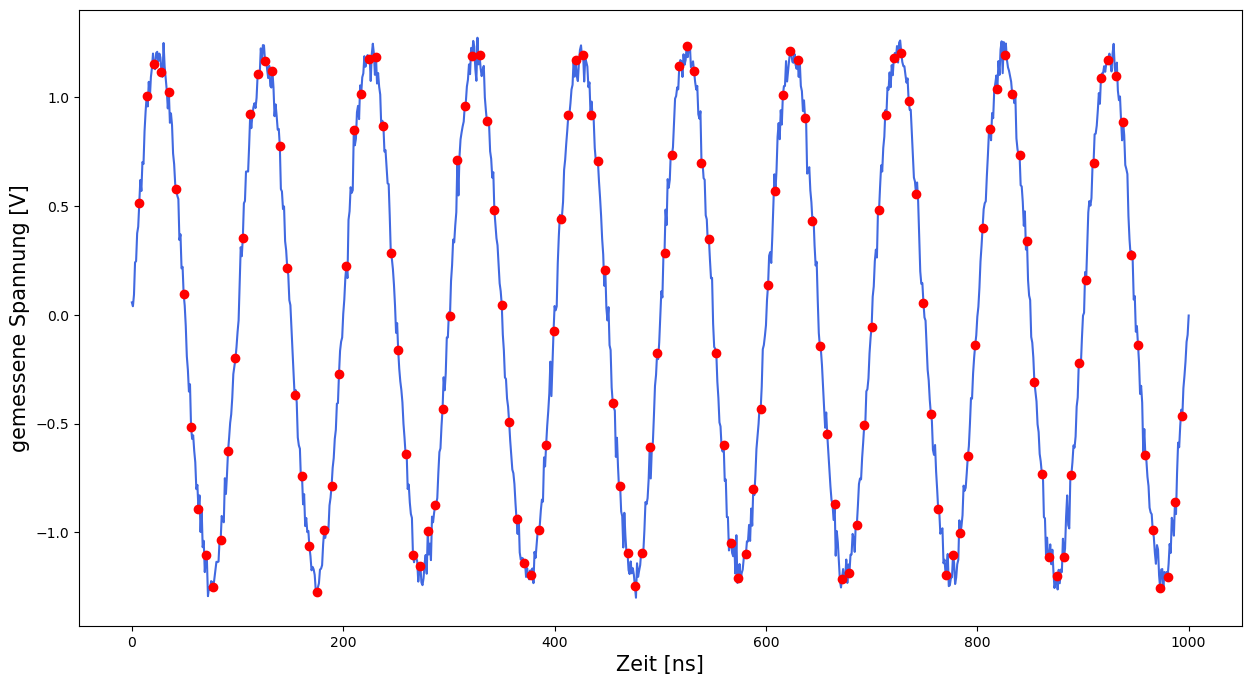

In [5]:
plt.figure(figsize=(15, 8))
plt.scatter(t_mess, U_mess, zorder=2, color = "red", marker='o')
plt.plot(t, U, color='royalblue', label="Spannung U (V)", zorder=1) # zorder erlaubt uns, auszuwählen, was im Vordergrund gezeichnet wird
#plt.axes().set_aspect('auto', 'datalim') # somehow doesn't work
plt.xlabel('Zeit [ns]', fontsize = 15)
plt.ylabel('gemessene Spannung [V]', fontsize = 15)
plt.show()

## Bestimmung der Signalamplitude

In [6]:
# als einfache Methode der Amplitudenbestimmung verwneden wir die minimalen und maximalen Werte von U_mess

Amp_mess = (max(U_mess) - min(U_mess))/2
print(Amp_mess)

1.2550000000000001
